### Artificial Neural Network

#### Import Required Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [11]:
df = pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


#### Data Exploration and Preprocessing

In [12]:
df.shape

(20000, 17)

In [13]:
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [14]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [15]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


#### Separating Features (X) and Target Feature (y)

In [16]:
X = df.drop('letter', axis=1)
y = df['letter']

#### Label Encoding Target feature

In [17]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [18]:
y_encoded

array([19,  8,  3, ..., 19, 18,  0])

#### One Hot Encoding labels for ANN

In [19]:
y_onehot = pd.get_dummies(y_encoded)

#### Normalizing / Standardizing X Features 

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Train Test split (Splitig data into 80% and 20%)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42, stratify=y)

In [22]:
print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of testing data:", X_test.shape, y_test.shape)

Shape of training data: (16000, 16) (16000, 26)
Shape of testing data: (4000, 16) (4000, 26)


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Dataset having around 20000 samples, 16 features and 1 label
* Target Variable is categorical (letters)
* The dataset does not contain any missing values.
* Preprocessing :
    * Label encoding for categorical target
    * Feature Scaling using Standard Scaler
* Other than the all features the target feature 'letter' is of object datatype, so applied label encoding adn after that One hot encoding for ANN.
* We have transformed the data using standard scaler in a standard form.
* Finally splitted the dataset using the train and test split for model building.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### Model Implementation (Defining ANN Model)

In [23]:
default_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'),  # Hidden layer with 64 neurons
    Dense(32, kernel_initializer='uniform', activation='relu'), # Another hidden layer
    Dense(y_train.shape[1], activation='softmax')  # Output layer (softmax for multi-class)
])

#### Compiling Model

In [24]:
default_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model
history = default_model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2751 - loss: 2.6602 - val_accuracy: 0.6587 - val_loss: 1.2319
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6661 - loss: 1.1487 - val_accuracy: 0.7178 - val_loss: 0.9240
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7400 - loss: 0.8704 - val_accuracy: 0.7753 - val_loss: 0.7587
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7854 - loss: 0.7348 - val_accuracy: 0.8097 - val_loss: 0.6598
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8181 - loss: 0.6161 - val_accuracy: 0.8341 - val_loss: 0.5923
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.5274 - val_accuracy: 0.8491 - val_loss: 0.5383
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8550 - loss: 0.4765 - val_accuracy: 0.8575 - val_loss: 0.4966
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8739 - loss: 0.4378 - val_accuracy: 0.

In [27]:
# Evaluate on test set
test_loss, test_accuracy = default_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9380
Test Loss: 0.1993


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Default Base ANN Model:
    * Input 16 Features
    * Hidden Layers 1-2 with 64 and 32 neurons dense layers with Relu activation function
    * Output Softmax for Multiclass Classification
    * Loss : Categorical Crossentropy
    * Optimizer : Adam
    * Trained for 50 epochs with batch size 32
* The accuracy for training data is 97% and for test data 93% which is good and the loss rate is also low with 50 epochs using adam optimizer.
* We will tune the different optimisers and parameters to check reduce the loss rate with hyper parameter tuning

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

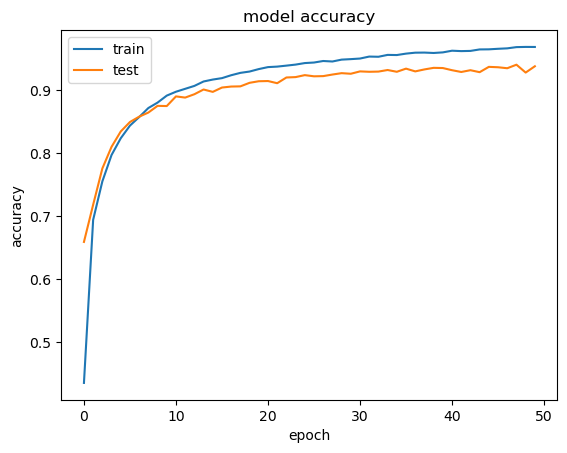

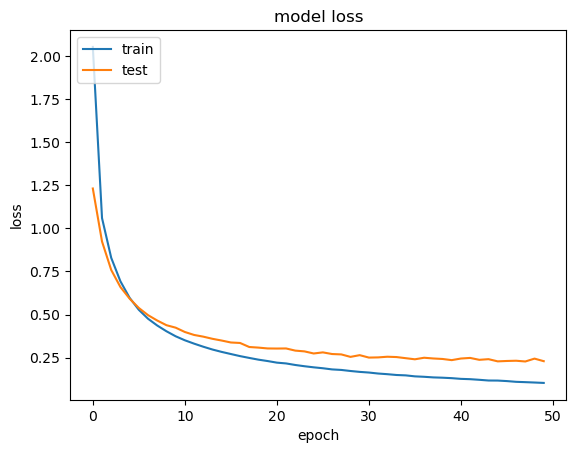

In [28]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The accuracy is increasing after approximately 15th epoch and getting stable at 50th epoch with around 97% for training and 93 % for testing.
* We can see in the another graph the loss is gettign decreased after 20th epoch and gettign  stable at 50th epoch.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### Hyperparameter Tuning

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Hyperparameter tuning using Grod Search CV
* Parameters Tuned: 
    * Batch size : [32,64,128]
    * Epochs : [10,20,30]
    * Activation Function : ReLU, Tanh, linear
    * Kernel Initializers : Uniform, Normal, Zero
* K fold Cross validation with 5 folds
* We can see in the another graph the loss is gettign decreased after 20th epoch and gettign  stable at 50th epoch.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

In [29]:
#!pip install scikeras

In [30]:
len(label_encoder.classes_)

26

In [31]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [32]:
# Buiding a Model function

def build_model(optimizer='adam', activation='relu',neurons=64):
    model=Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(neurons//2, activation=activation))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
## Wrapping Classifier 
classifier = KerasClassifier(build_fn=build_model, verbose=0)

In [34]:
## Hyperparameters 

param_list = {
    'batch_size' : [32,64,128],
    'epochs' : [10,20,30],
   # 'model__optimizer' : ['adam', 'rmsprop'],
   # 'model__activation' : ['relu', 'tanh'],
   # 'model__neurons' : [32,64,128]
}

In [35]:
X_train.shape, y_train.shape

((16000, 16), (16000, 26))

#### Hyperparameter Tuning Batch Size and Epochs

In [36]:
## Build and fit GridSearchCV
# Create an instance of KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=classifier, param_grid=param_list, cv=kfold, verbose=10)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=32, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=32, epochs=10;, score=0.888 total time=   8.1s
[CV 2/5; 1/9] START batch_size=32, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=32, epochs=10;, score=0.887 total time=   8.2s
[CV 3/5; 1/9] START batch_size=32, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=32, epochs=10;, score=0.881 total time=   7.8s
[CV 4/5; 1/9] START batch_size=32, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=32, epochs=10;, score=0.878 total time=   8.2s
[CV 5/5; 1/9] START batch_size=32, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=32, epochs=10;, score=0.869 total time=   8.4s
[CV 1/5; 2/9] START batch_size=32, epochs=20....................................
[CV 1/5; 2/9] END .....batch_size=32, epochs=20;,

In [37]:
print(f"Best Score : {grid_result.best_score_}")
print(f"Best Params : {grid_result.best_params_}")

Best Score : 0.9286875
Best Params : {'batch_size': 32, 'epochs': 30}


#### Hyperparameter Tuning Activation Function and Kernel Initializer

In [38]:
## Buiding Model 
from tensorflow.keras.optimizers import Adam

def build_model1(activation_function,init, neurons=64):
    model = Sequential()
    model.add(Dense(neurons, activation=activation_function, kernel_initializer=init, input_shape=(X_train.shape[1],)))
    model.add(Dense(neurons//2, activation=activation_function, kernel_initializer=init))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    adam = Adam(learning_rate = 0.001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [39]:
## Wrapping Classifier 
tuned_model = KerasClassifier(build_fn = build_model1,verbose = 0,batch_size = 40,epochs = 50,activation_function = ['softmax','relu','tanh','linear'],init = ['uniform','normal','zero'])

param_grid = {
    'activation_function' : ['relu','tanh','linear'],
    'init' : ['uniform','normal','zero'] # kernel initializer 
}

In [40]:
## Build And fit GridSearchCV
## Build and fit GridSearchCV
# Create an instance of KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(estimator = tuned_model,param_grid = param_grid,cv = kfold,verbose = 10)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=relu, init=uniform......................
[CV 1/5; 1/9] END activation_function=relu, init=uniform;, score=0.937 total time=  25.5s
[CV 2/5; 1/9] START activation_function=relu, init=uniform......................
[CV 2/5; 1/9] END activation_function=relu, init=uniform;, score=0.931 total time=  27.3s
[CV 3/5; 1/9] START activation_function=relu, init=uniform......................
[CV 3/5; 1/9] END activation_function=relu, init=uniform;, score=0.926 total time=  26.1s
[CV 4/5; 1/9] START activation_function=relu, init=uniform......................
[CV 4/5; 1/9] END activation_function=relu, init=uniform;, score=0.924 total time=  26.7s
[CV 5/5; 1/9] START activation_function=relu, init=uniform......................
[CV 5/5; 1/9] END activation_function=relu, init=uniform;, score=0.930 total time=  26.7s
[CV 1/5; 2/9] START activation_function=relu, init=normal.......................
[CV 

In [41]:
print(f"Best Score : {grid_result.best_score_}")
print(f"Best Params : {grid_result.best_params_}")

Best Score : 0.9328749999999999
Best Params : {'activation_function': 'relu', 'init': 'normal'}


### Evaluation

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predictions
y_pred_default_probs = default_model.predict(X_test)   # This gives probabilities or labels depending on wrapper

# If probabilities, convert to labels:
if y_pred_default_probs.ndim > 1 and y_pred_default_probs.shape[1] > 1:
    y_pred = y_pred_default_probs.argmax(axis=1)
else:
    y_pred = y_pred_default_probs

# Make sure y_test is in the same format as y_pred (both should be 1D arrays of class indices)
# If y_test is a DataFrame, convert it to numpy array first
if hasattr(y_test, 'values'):
    y_test_array = y_test.values  # Convert DataFrame to numpy array
else:
    y_test_array = y_test

# Check if one-hot encoded
if hasattr(y_test_array, 'shape') and len(y_test_array.shape) > 1 and y_test_array.shape[1] > 1:
    y_test_indices = np.argmax(y_test_array, axis=1)  # Convert one-hot to indices using numpy's argmax
else:
    y_test_indices = y_test_array  # Already in the right format

# Accuracy
acc = accuracy_score(y_test_indices, y_pred)
print("Accuracy:", acc)

# Precision, Recall, F1
precision = precision_score(y_test_indices, y_pred, average='weighted')
recall = recall_score(y_test_indices, y_pred, average='weighted')
f1 = f1_score(y_test_indices, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Detailed Report
print("\nClassification Report: Default Model : \n")
print(classification_report(y_test_indices, y_pred, target_names=label_encoder.classes_.astype(str)))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.938
Precision: 0.9389
Recall:    0.9380
F1 Score:  0.9380

Classification Report: Default Model : 

              precision    recall  f1-score   support

           A       0.98      0.96      0.97       158
           B       0.92      0.93      0.93       153
           C       0.95      0.95      0.95       147
           D       0.94      0.95      0.95       161
           E       0.91      0.92      0.91       154
           F       0.91      0.94      0.92       155
           G       0.89      0.92      0.90       155
           H       0.84      0.89      0.86       147
           I       0.98      0.87      0.92       151
           J       0.89      0.97      0.93       149
           K       0.91      0.93      0.92       148
           L       0.94      0.94      0.94       152
           M       0.99      0.95      0.97       158
           N       0.95      0.92      0.94       157
           O       0.93      0.92   

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predictions
y_pred_tuned_probs = grid_result.predict(X_test)   # This gives probabilities or labels depending on wrapper

# If probabilities, convert to labels:
if y_pred_tuned_probs.ndim > 1 and y_pred_tuned_probs.shape[1] > 1:
    y_pred = y_pred_tuned_probs.argmax(axis=1)
else:
    y_pred = y_pred_tuned_probs

# Make sure y_test is in the same format as y_pred (both should be 1D arrays of class indices)
# If y_test is a DataFrame, convert it to numpy array first
if hasattr(y_test, 'values'):
    y_test_array = y_test.values  # Convert DataFrame to numpy array
else:
    y_test_array = y_test

# Check if one-hot encoded
if hasattr(y_test_array, 'shape') and len(y_test_array.shape) > 1 and y_test_array.shape[1] > 1:
    y_test_indices = np.argmax(y_test_array, axis=1)  # Convert one-hot to indices using numpy's argmax
else:
    y_test_indices = y_test_array  # Already in the right format

# Accuracy
acc = accuracy_score(y_test_indices, y_pred)
print("Accuracy:", acc)

# Precision, Recall, F1
precision = precision_score(y_test_indices, y_pred, average='weighted')
recall = recall_score(y_test_indices, y_pred, average='weighted')
f1 = f1_score(y_test_indices, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Detailed Report
print("\nClassification Report: Tuned Model : \n")
print(classification_report(y_test_indices, y_pred, target_names=label_encoder.classes_.astype(str)))

Accuracy: 0.93825
Precision: 0.9395
Recall:    0.9383
F1 Score:  0.9383

Classification Report: Tuned Model : 

              precision    recall  f1-score   support

           A       0.99      0.96      0.97       158
           B       0.94      0.89      0.92       153
           C       0.93      0.97      0.95       147
           D       0.92      0.94      0.93       161
           E       0.88      0.96      0.92       154
           F       0.91      0.93      0.92       155
           G       0.89      0.90      0.89       155
           H       0.91      0.88      0.89       147
           I       0.96      0.87      0.92       151
           J       0.92      0.93      0.93       149
           K       0.91      0.92      0.91       148
           L       0.97      0.94      0.96       152
           M       0.99      0.96      0.97       158
           N       0.98      0.93      0.95       157
           O       0.92      0.96      0.94       150
           P       0.95

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Metrics used : Accuracy, Precision, Recall, F1 Score
* Default Model :
    * Accuracy : 93%
    * F1 Score : 93%
    * The accuracy with the default model is likely to be reasonable.
    * Precision / recall for rare classes will be low.
* Tuned Model :
    * Accuracy : 94%
    * Higher precision/recall for most classes.
    * After adjusting hyperparameter hidden layers, neurons, batch size, epochs, improving the overall accuracy.
    * Showing better F1 scores for most of the classes
* Use of different activation functions affects non linearity and gradient flow
* Batch size and epochs helps in generalising the model.
* Both the Default ANN model and the Tuned ANN model achieved strong performance on the alphabet classification task with an overall accuracy of ~94%.
* While overall metrics were stable, hyperparameter tuning caused shifts in per-class performance indicates that tuning redistributed performance across classes rather than improving global accuracy.
* The Default Model already captured the data patterns effectively, leaving limited room for significant improvement.
* Hyperparameter tuning did not boost global accuracy but did change the balance of precision and recall for specific alphabets.
* Hyperparameter tuning may not always increase overall accuracy but can significantly affect class-specific performance and generalization trade-offs.
  
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">